<a href="https://colab.research.google.com/github/Devu-Goyal/IDS-project/blob/main/Check_heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt                           # for analysing using figures
import seaborn as sns                                     # works on matplotlib for visualisations
import pandas as pd                                       # structuring data
import numpy as np                                        # for array
from sklearn.preprocessing import StandardScaler          # standardised data
from sklearn.model_selection import train_test_split      # split data in training and test data
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC                               # support vector machine
from sklearn.neighbors import KNeighborsClassifier        # K-nearest neighbour

# **Analysing data collected**

In [ ]:
data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')       # uploading data to pandas dataset
data.head(20)                                     # printing what we have uploaded

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
data.shape            # no. of rows and features in data set

(299, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
data.describe()       # different statical values for features

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


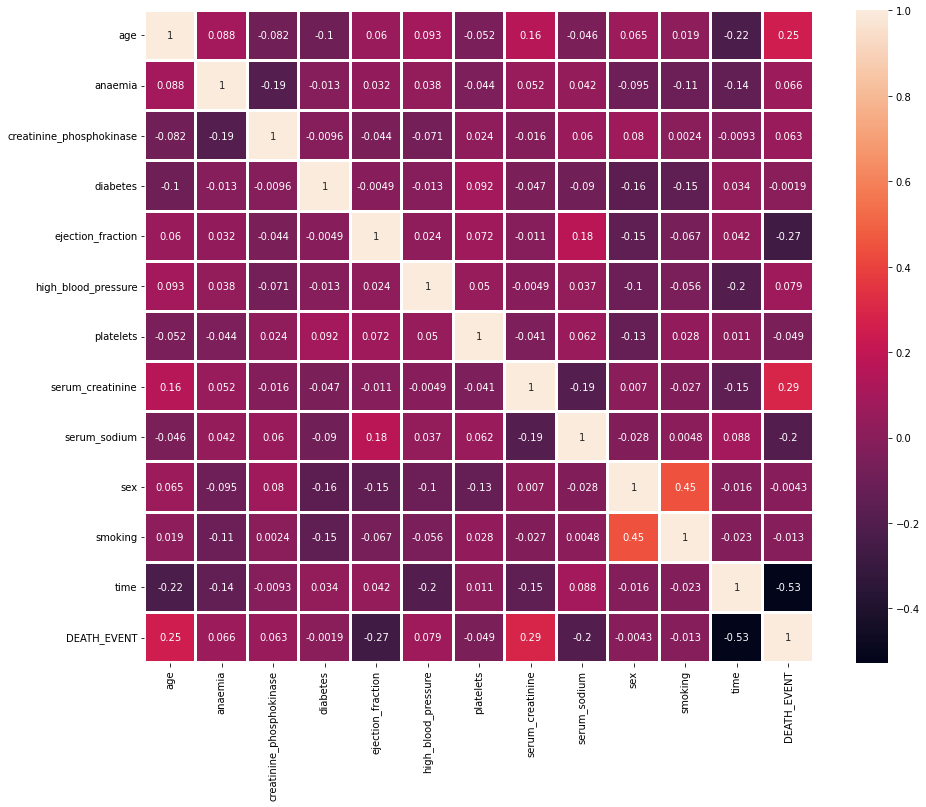

In [ ]:
# for getting relation between features
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), annot=True, linewidths=2)
plt.show()

In [ ]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

# **Data before and After standardisation**

In [ ]:
# Before
a = data.drop(columns = 'DEATH_EVENT', axis=1)    # Only features
b = data['DEATH_EVENT']                           # Only outcomes
print("")                      
print("-----------------Data Representing only Features before Standardization-------------------")
print("")
print(a)
print("")
print("")
print("")
print("-----------------Data Representing only Outcomes before Standardization-------------------")
print("")
print(b)


-----------------Data Representing only Features before Standardization-------------------

      age  anaemia  creatinine_phosphokinase  ...  sex  smoking  time
0    75.0        0                       582  ...    1        0     4
1    55.0        0                      7861  ...    1        0     6
2    65.0        0                       146  ...    1        1     7
3    50.0        1                       111  ...    1        0     7
4    65.0        1                       160  ...    0        0     8
..    ...      ...                       ...  ...  ...      ...   ...
294  62.0        0                        61  ...    1        1   270
295  55.0        0                      1820  ...    0        0   271
296  45.0        0                      2060  ...    0        0   278
297  45.0        0                      2413  ...    1        1   280
298  50.0        0                       196  ...    1        1   285

[299 rows x 12 columns]



-----------------Data Representing only

In [ ]:
# Doing Standardization
scaler = StandardScaler()
scaler.fit(a)
stnd_data = scaler.transform(a)
A = stnd_data                                 # whole dataset
B = data['DEATH_EVENT']                           # only outcomes
# After Standardization
print("")                      
print("-----------------Data Representing Outcomes + Features after Standardization-------------------")
print("")
print(A)
print("")
print("")
print("")
print("-----------------Data Representing only Outcomes after Standardization-------------------")
print("")
print(B)


-----------------Data Representing Outcomes + Features after Standardization-------------------

[[ 1.19294523e+00 -8.71104775e-01  1.65728387e-04 ...  7.35688190e-01
  -6.87681906e-01 -1.62950241e+00]
 [-4.91279276e-01 -8.71104775e-01  7.51463953e+00 ...  7.35688190e-01
  -6.87681906e-01 -1.60369074e+00]
 [ 3.50832977e-01 -8.71104775e-01 -4.49938761e-01 ...  7.35688190e-01
   1.45416070e+00 -1.59078490e+00]
 ...
 [-1.33339153e+00 -8.71104775e-01  1.52597865e+00 ... -1.35927151e+00
  -6.87681906e-01  1.90669738e+00]
 [-1.33339153e+00 -8.71104775e-01  1.89039811e+00 ...  7.35688190e-01
   1.45416070e+00  1.93250906e+00]
 [-9.12335403e-01 -8.71104775e-01 -3.98321274e-01 ...  7.35688190e-01
   1.45416070e+00  1.99703825e+00]]



-----------------Data Representing only Outcomes after Standardization-------------------

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


# **Splitting dataset into Training and Test-Set**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(A,B, test_size = 0.2, stratify=B, random_state=2)

In [ ]:
print(X_train.shape)
print(X_train)

(239, 12)
[[-1.16496908e+00 -8.71104775e-01  1.65728387e-04 ...  7.35688190e-01
  -6.87681906e-01  9.12947806e-01]
 [ 1.61400136e+00 -8.71104775e-01  2.00441579e-01 ... -1.35927151e+00
  -6.87681906e-01 -3.36674053e-03]
 [-4.91279276e-01 -8.71104775e-01  1.27821471e+00 ... -1.35927151e+00
  -6.87681906e-01  1.81635651e+00]
 ...
 [-2.38645600e-01 -8.71104775e-01 -4.64391657e-01 ...  7.35688190e-01
  -6.87681906e-01  1.28721713e+00]
 [-6.59701727e-01  1.14796753e+00  1.29209447e-01 ...  7.35688190e-01
   1.45416070e+00  1.01619452e+00]
 [ 3.50832977e-01  1.14796753e+00 -2.85795151e-01 ...  7.35688190e-01
  -6.87681906e-01 -5.58317804e-01]]


In [ ]:
print(Y_train.shape)
print(Y_train)

(239,)
223    0
165    1
295    0
133    0
251    0
      ..
58     1
140    1
257    0
233    0
100    0
Name: DEATH_EVENT, Length: 239, dtype: int64


In [ ]:
print(X_test.shape)
print(X_test)

(60, 12)
[[-1.58602521e+00 -8.71104775e-01 -5.34591440e-01 -8.47579380e-01
   1.62199114e-01 -7.35688190e-01 -7.61548671e-01 -6.71857022e-01
   7.66063830e-01  7.35688190e-01 -6.87681906e-01  1.48080471e+00]
 [ 9.81993013e-02 -8.71104775e-01 -5.69691331e-01  1.17983050e+00
   1.85495776e+00  1.35927151e+00 -1.98258098e-01 -4.78204687e-01
   5.39053835e-01  7.35688190e-01 -6.87681906e-01 -1.71142643e-01]
 [-7.02231493e-02  1.14796753e+00 -5.01556248e-01  1.17983050e+00
   1.85495776e+00  1.35927151e+00  7.82663649e-02 -6.71857022e-01
  -1.41976151e-01 -1.35927151e+00 -6.87681906e-01 -4.67976933e-01]
 [-1.58602521e+00 -8.71104775e-01 -5.34591440e-01 -8.47579380e-01
  -6.84180207e-01 -7.35688190e-01 -4.95265854e-01  2.32975417e+00
  -1.95805611e+00  7.35688190e-01  1.45416070e+00  1.54533390e+00]
 [ 7.71889104e-01 -8.71104775e-01 -4.74715155e-01  1.17983050e+00
   5.85388775e-01  1.35927151e+00  2.11407773e-01 -9.09000174e-02
  -1.41976151e-01  7.35688190e-01  1.45416070e+00 -1.34557396e+

In [ ]:
print(Y_test.shape)
print(Y_test)

(60,)
273    0
151    0
116    0
282    0
27     1
196    0
135    0
78     0
263    0
261    0
265    0
119    1
256    0
194    1
111    0
190    0
205    0
84     1
121    0
38     0
189    0
139    0
6      1
214    0
37     1
97     0
167    1
284    0
288    0
103    0
191    0
142    0
120    0
175    0
168    0
49     1
31     1
104    0
99     0
22     1
181    1
122    0
15     1
146    0
115    0
246    1
156    0
224    0
293    0
130    0
217    1
183    1
210    0
67     1
241    0
44     1
87     0
25     1
126    1
57     0
Name: DEATH_EVENT, dtype: int64


# **Training datasets using SVM and KNN**

In [ ]:
# for displaying Confusion matrix
def displaying(y_test, y_prdct)->float:
  acc = accuracy_score(y_test, y_prdct)
  matrix = confusion_matrix(y_test, y_prdct)
  sns.heatmap(matrix, annot=True, fmt="d")
  plt.title(f"Accuracy: {acc:0.4f}")
  plt.xlabel("Predicted labels")
  plt.ylabel("Actual labels")
  plt.show()
  return acc

def classify(clsf, x_train=X_train, y_train=Y_train, x_test=X_test, y_test=Y_test)->float:
  clsf.fit(x_train, y_train)
  y_prdct = clsf.predict(x_test)
  acc = displaying(y_test, y_prdct)
  print(classification_report(y_test, y_prdct))
  return acc

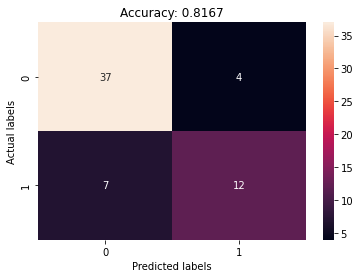

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        41
           1       0.75      0.63      0.69        19

    accuracy                           0.82        60
   macro avg       0.80      0.77      0.78        60
weighted avg       0.81      0.82      0.81        60



In [ ]:
# Using Linear SVM as our classification model
model = SVC(kernel="linear", random_state=0)
model_acc = classify(model)

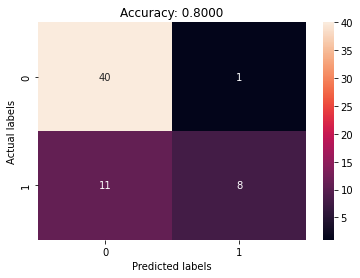

              precision    recall  f1-score   support

           0       0.78      0.98      0.87        41
           1       0.89      0.42      0.57        19

    accuracy                           0.80        60
   macro avg       0.84      0.70      0.72        60
weighted avg       0.82      0.80      0.78        60



In [ ]:
# Using KNN as our classification model
model = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
model_acc = classify(model)

# **Constructing a generalised Predecting System**

In [ ]:
# just predecting whether the person is diabetic or not
input = (69, 1, 669, 0, 19, 0, 696969, 1.6, 125, 1, 0, 16)

data_array = np.asarray(input)                    # making numpy array
data_reshape = data_array.reshape(1, -1)          # data reshaping coz predecting for an instance

stnd_data = scaler.transform(data_reshape)             # standardising data
print(stnd_data)

# selecting SVM classifier
classifier = SVC(kernel='linear')
classifier.fit(X_train, Y_train)

prediction = classifier.predict(stnd_data)
print(prediction)

if(prediction[0]==0):
  print("----------------------Heart won't fail----------------------------")
else:
  print("------------------------Heart-faliure-----------------------------")






[[ 0.68767788  1.14796753  0.08998016 -0.84757938 -1.61519746 -0.73568819
   4.4408904   0.19957848 -2.6390861   0.73568819 -0.68768191 -1.47463235]]
[1]
------------------------Heart-faliure-----------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
